In [1]:
import radis
from radis import plot_diff
from radis import SpectrumFactory
from radis.test.utils import getTestFile
from radis import calc_spectrum

## Let us first start with the test file

In [23]:
T = 1000
p = 0.1
wstep = 0.001
wmin = 2284.0  # cm-1
wmax = 2285.0  # cm-1
sf = SpectrumFactory(
        wavenum_min=wmin,
        wavenum_max=wmax,
        mole_fraction=0.01,
        path_length=1,  # doesnt change anything
        wstep=wstep,
        pressure=p,
        isotope="1",
        chunksize="DLM",
        warnings={
            "MissingSelfBroadeningWarning": "ignore",
            "NegativeEnergiesWarning": "ignore",
            "HighTemperatureWarning": "ignore",
            "GaussianBroadeningWarning": "ignore",
        }
)
sf._broadening_method = "fft"

Load the data in memory, for this case we're using a CDSD-4000 fragment as an example

In [24]:
dirpath = getTestFile("cdsd_hitemp_09_fragment.txt")

In [25]:
sf.load_databank(path=dirpath, format="cdsd-4000", parfuncfmt="hapi")

Compute the spectrum on RADIS CPU

In [26]:
s_cpu = sf.eq_spectrum(Tgas=T)

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 1000 K
   Trot                 1000 K
   Tvib                 1000 K
   isotope              1
   mole_fraction        0.01
   molecule             CO2
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2285.0000 cm-1
   wavenum_min          2284.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               1e-27 cm-1/(#.cm-2)
   db_assumed_sorted    True
   dbformat             cdsd-4000
   dbpath               /home/pankaj/radis/radis/test/files/cdsd_hitemp_09_fragment.txt
   dlm_log_pG           0.1375350788016573
   dlm_log_pL           0.20180288881201608
   include_neighbouring_line

### CPU Spectrum absorbance

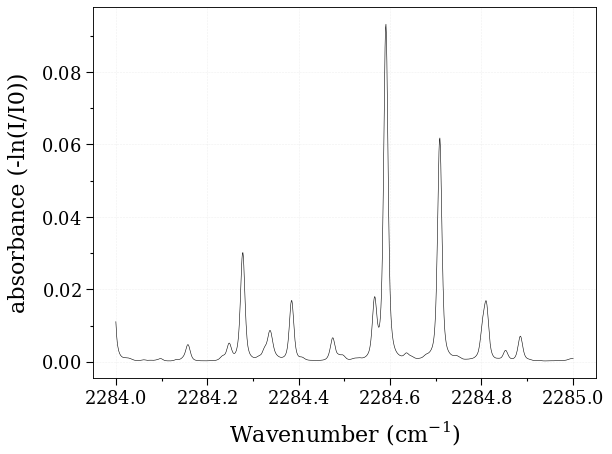

In [27]:
s_cpu.plot('absorbance')

Now let us compute the same spectra on RADIS GPU

In [28]:
s_gpu = sf.eq_spectrum_gpu(Tgas=T)

Initializing parameters... 
Spectral points per block  : 256
Threads per block          : 1024
Spectral points per thread : 0

Initializing Lorentzian parameters  (from cache)...  done!
Initializing Gaussian parameters (from cache)...  done!
Number of lines loaded: 2284

Allocating device memory and copying data...
Copying initialization parameters to device memory... done!
Copying spectral data to device memory... done!
Initialization complete!
Time to copy data from host to device = 2.4335360527038574 ms
done!
Calculating spectra... Copying iteration parameters to device... done!
Getting ready...
<<<LAUNCHED>>>  Performing Fourier transform... done!
Applying lineshapes... done!
Performing inverse Fourier transform... done!
[rG = 0.02365392014549439% rL = 7.92964625116257%] Runtime: 0.18915200233459473 + 610.2510945796967 = 610.4402465820312 ms
Finished calculating spectrum!


### GPU Spectrum absorbance

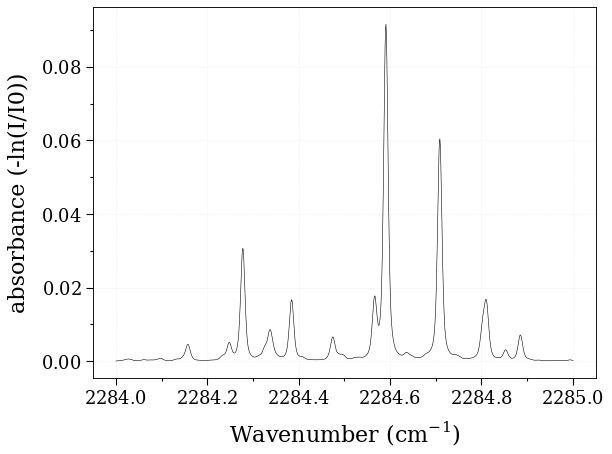

In [29]:
s_gpu.plot('absorbance')

Let us now look at the calculation times for the two spectras

In [30]:
print("spectrum computed on CPU in {0} ms".format(s_cpu.get_conditions()['calculation_time']))
print("spectrum computed on GPU in {0} ms".format(s_gpu.get_conditions()['calculation_time']))

spectrum computed on CPU in 0.08 ms
spectrum computed on GPU in 0.64 ms


Let us now compare the results of the two spectras:

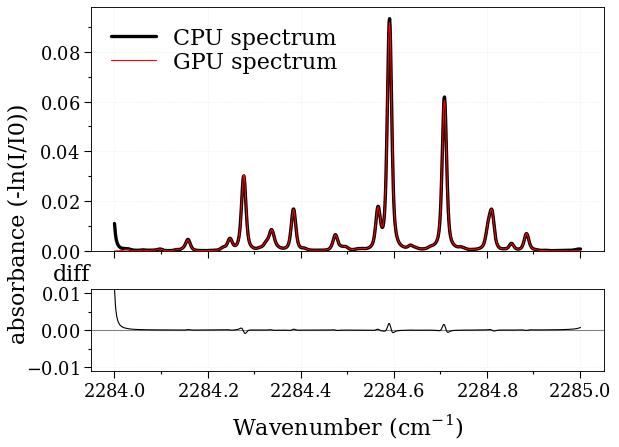

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fa9ece6cac8>])

In [31]:
s_cpu.name = "CPU spectrum"
s_gpu.name = "GPU spectrum"
plot_diff(s_cpu, s_gpu, var='absorbance')

--------------------------------------------------------------------------------

Let us now look at a larger example with around 5M lines.

In [2]:
T = 1000
p = 0.1
wstep = 0.001
wmin = 2300.0  # cm-1
wmax = 2400.0  # cm-1
sf = SpectrumFactory(
        wavenum_min=wmin,
        wavenum_max=wmax,
        mole_fraction=0.01,
        path_length=1,  # doesnt change anything
        wstep=wstep,
        cutoff=0,
        pressure=p,
        isotope="1,2,3",
        chunksize="DLM",
        warnings={
            "MissingSelfBroadeningWarning": "ignore",
            "NegativeEnergiesWarning": "ignore",
            "HighTemperatureWarning": "ignore",
            "GaussianBroadeningWarning": "ignore",
        }
)
sf._broadening_method = "fft"

In [3]:
dirpath = '/home/pankaj/radis-lab/par-2300-2400/*'
sf.load_databank(path=dirpath, format="cdsd-4000", parfuncfmt="hapi")

In [4]:
sf.df0

,id,iso,wav,int,A,airbrd,selbrd,El,Tdpair,Pshft,...,polyu,wangu,ranku,polyl,wangl,rankl,branch,jl,Ia,molar_mass
0,2,1,2330.0000,1.110000e-82,0.4850,0.0446,0.0689,29897.7097,0.56,0.000000,...,30,1,267,27,1,152,1,175,0.984204,43.98983
1,2,1,2330.0000,1.460000e-71,0.0975,0.0573,0.0639,24199.1858,0.63,0.000000,...,32,1,420,29,1,262,1,107,0.984204,43.98983
2,2,1,2330.0000,1.010000e-77,1.7100,0.0690,0.0899,27482.8406,0.68,-0.003147,...,43,2,922,40,2,622,1,35,0.984204,43.98983
3,2,1,2330.0000,2.560000e-72,0.5220,0.0687,0.0768,24764.9686,0.72,-0.000200,...,39,1,463,36,1,265,1,54,0.984204,43.98983
4,2,1,2330.0000,4.010000e-73,0.1340,0.0642,0.0633,24957.2457,0.69,0.005093,...,34,1,733,31,1,553,1,85,0.984204,43.98983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878704,2,1,2389.9997,9.930000e-78,0.3730,0.0496,0.0674,27433.4246,0.57,0.000000,...,32,1,585,29,1,406,1,135,0.984204,43.98983
4878705,2,1,2389.9998,1.200000e-63,0.1310,0.0692,0.0906,20286.3902,0.69,-0.002130,...,32,1,446,29,2,240,0,38,0.984204,43.98983
4878706,2,1,2389.9998,3.660000e-49,0.3680,0.0687,0.0814,13689.6194,0.71,-0.001324,...,21,1,198,18,1,118,1,48,0.984204,43.98983
4878707,2,1,2389.9998,9.750000e-62,0.3110,0.0653,0.0639,19716.7387,0.70,0.000000,...,28,1,324,25,1,186,1,81,0.984204,43.98983


In [7]:
s_cpu = sf.eq_spectrum(Tgas=T)

Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 1000 K
   Trot                 1000 K
   Tvib                 1000 K
   isotope              1,2,3
   mole_fraction        0.01
   molecule             CO2
   path_length          1 cm
   pressure_mbar        100.0 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2400.0000 cm-1
   wavenum_min          2300.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   broadening_method    fft
   cutoff               0 cm-1/(#.cm-2)
   db_assumed_sorted    True
   dbformat             cdsd-4000
   dbpath               /home/pankaj/radis-lab/par-2300-2400/cdsd_02330_02332,/home/pankaj/radis-lab/par-2300-2400/cdsd_0230...
   dlm_log_pG           0.1375350788016573
   dlm_log_pL           0.201802

/home/pankaj/radis/radis/misc/warning.py:242: MemoryUsageWarning: Line database is large: 1327 Mb. Consider using save_memory option, if you don't need to reuse this factory to calculate new spectra
  warnings.warn(WarningType(message))


Spectrum calculated in 5.42s


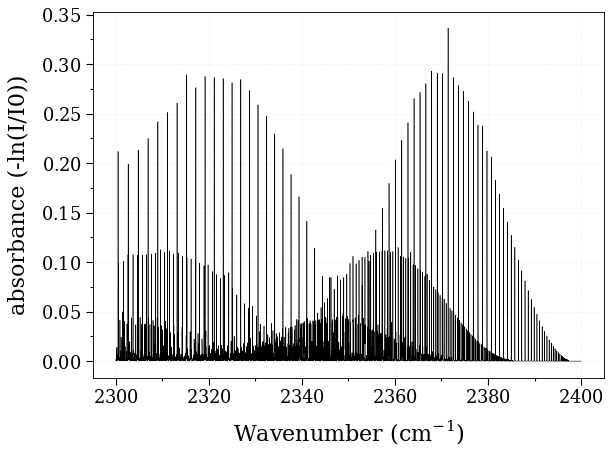

In [8]:
s_cpu.plot('absorbance')

In [5]:
s_gpu = sf.eq_spectrum_gpu(Tgas=T)

py_cuFFS module not found in directory...
Compiling module from source...
Finished compilation...trying to import module again
py_cuFFS imported succesfully!
Initializing parameters... 
Spectral points per block  : 256
Threads per block          : 1024
Spectral points per thread : 0

Initializing Lorentzian parameters  (from cache)...  done!
Initializing Gaussian parameters (from cache)...  done!
Number of lines loaded: 4878709

Allocating device memory and copying data...
Copying initialization parameters to device memory... done!
Copying spectral data to device memory... done!
Initialization complete!
Time to copy data from host to device = 36.23388671875 ms
done!
Calculating spectra... length of v0 =  4764
length of da =  4764
v_max = 2330.256103515625,      i_max=1024
new iteration : i = 0    n = 0     i_max = 1024      v_max = 2330.256103515625
     calculated i = 128    v_cur = 2306.26025390625
new iteration : i = 128    n = 0     i_max = 1024      v_max = 2330.256103515625
     

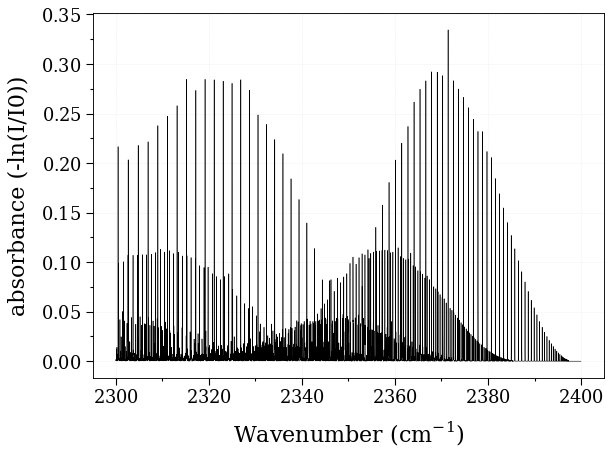

In [6]:
s_gpu.plot('absorbance')

In [10]:
s_cpu.name = "CPU spectrum"
s_gpu.name = "GPU spectrum"

<IPython.core.display.Javascript object>


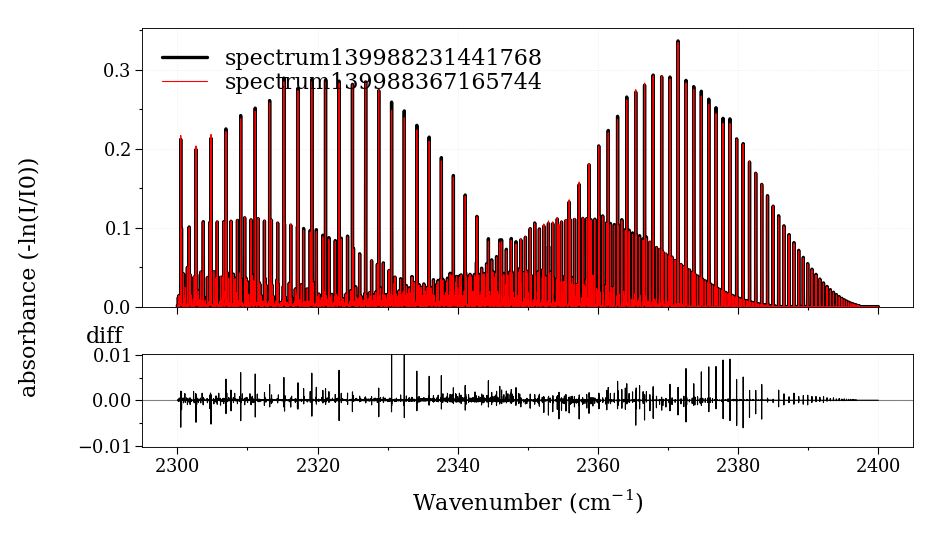

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f520d5e3978>])

In [9]:
%matplotlib notebook
plot_diff(s_cpu, s_gpu, var='absorbance')

In [11]:
print("CPU calculation time: ", s_cpu.get_conditions()['calculation_time'])
print("GPU calculation time: ", s_gpu.get_conditions()['calculation_time'])

CPU calculation time:  5.42
GPU calculation time:  0.5
